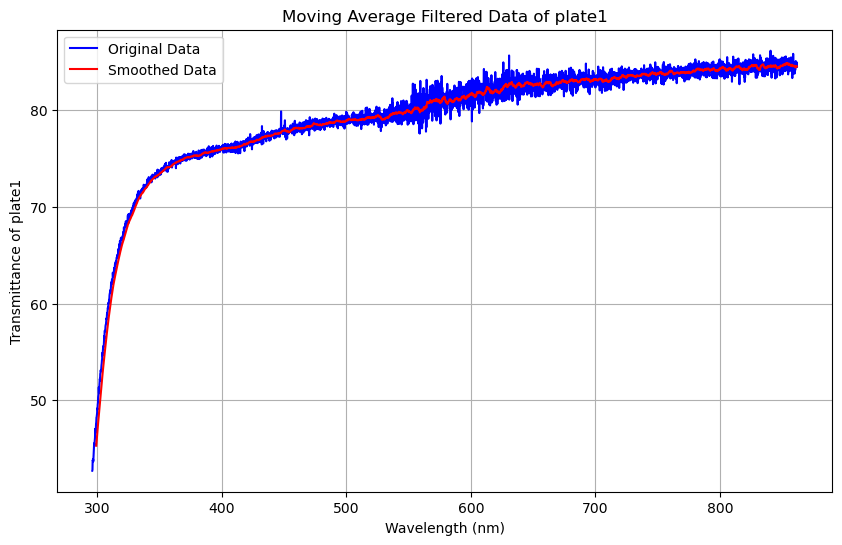

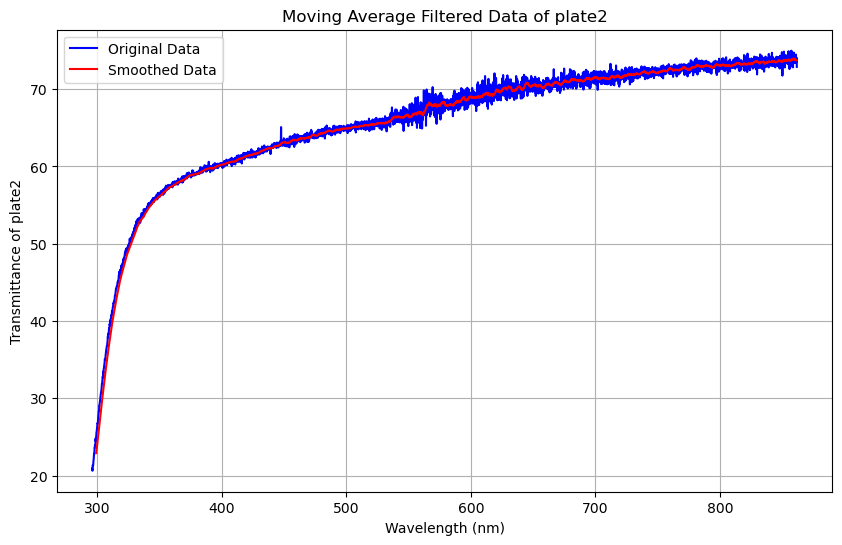

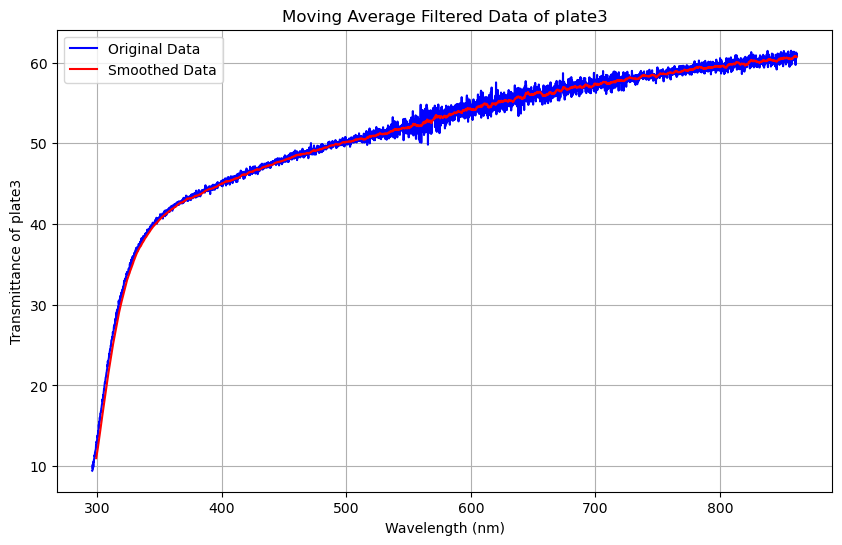

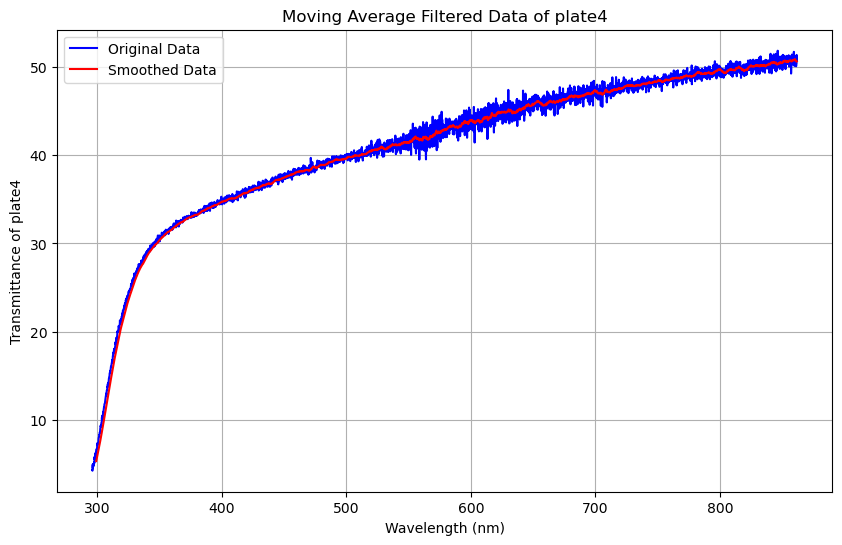

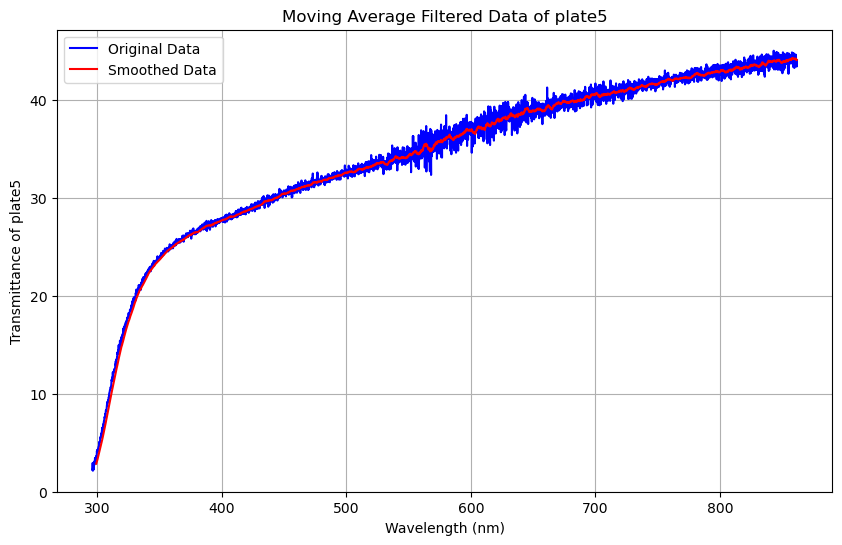

In [6]:
# 导入必要的库

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

## 第一次滤波 Numpy.comvolve滑动平均滤波（CVV）

# 读取Excel文件，跳过前五行
df = pd.read_excel('plate-all.xlsx', skiprows=5)

# 定义滑动窗口大小（选取多大范围取平均）
window_size = 20
# 定义滑动平均滤波器的权重
weights = np.ones(window_size) / window_size

# 提取波长和强度数据
for i in [1, 2, 3, 4, 5]:
    label = 'plate' + str(i)
    wavelength = df['Wavelength [nm]'].values
    intensity = df[label].values
    
    # 使用np.convolve函数进行滑动平均滤波
    smoothed_intensity = np.convolve(intensity, weights, mode='valid')  # 保持输出与输入相同的大小
    smoothed_wavelength = wavelength[(window_size-1):]
    
    # 绘制原始数据和滤波后的数据
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, intensity, label='Original Data', color='blue')
    plt.plot(smoothed_wavelength, smoothed_intensity, label='Smoothed Data', color='red')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Transmittance of ' + label)
    plt.title('Moving Average Filtered Data of ' + label)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 输出滤波后的数据到txt文件
    np.savetxt('filterdata_'+ label +'.txt', np.column_stack((smoothed_wavelength, smoothed_intensity)), delimiter='\t', header='Wavelength (nm)\tSmoothed Intensity', fmt='%0.6f')



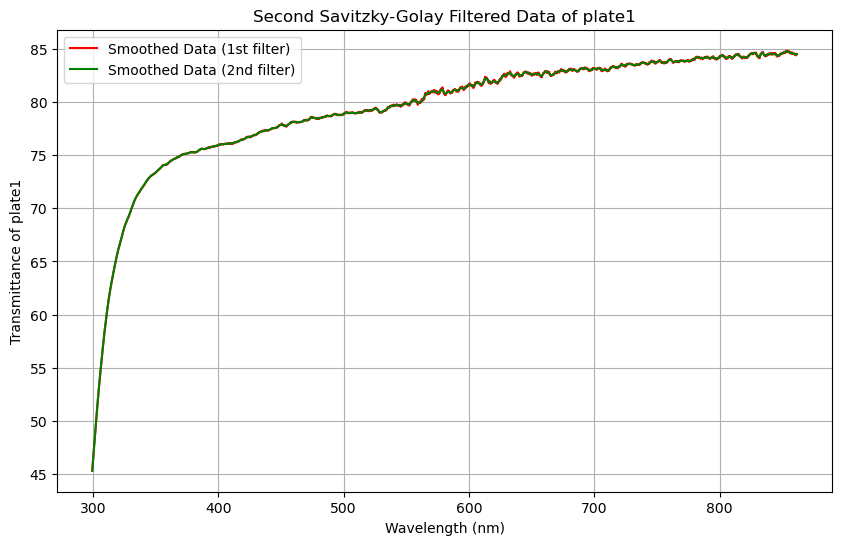

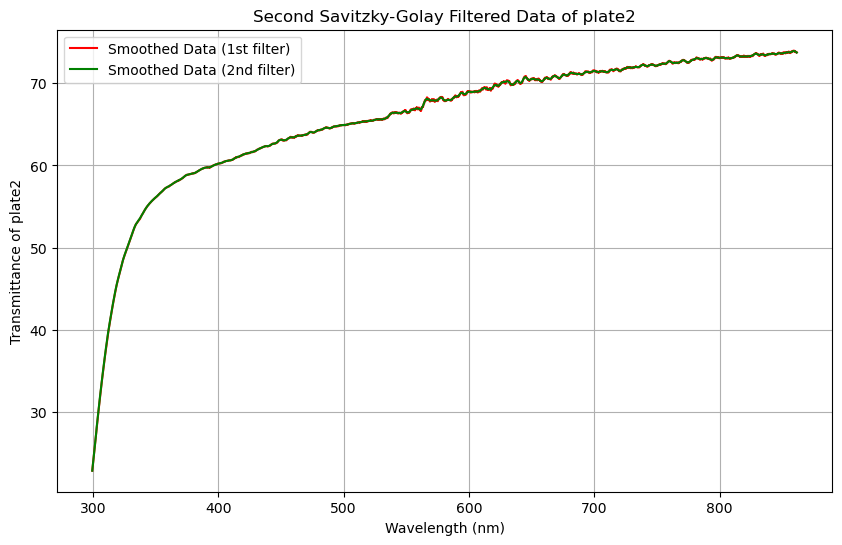

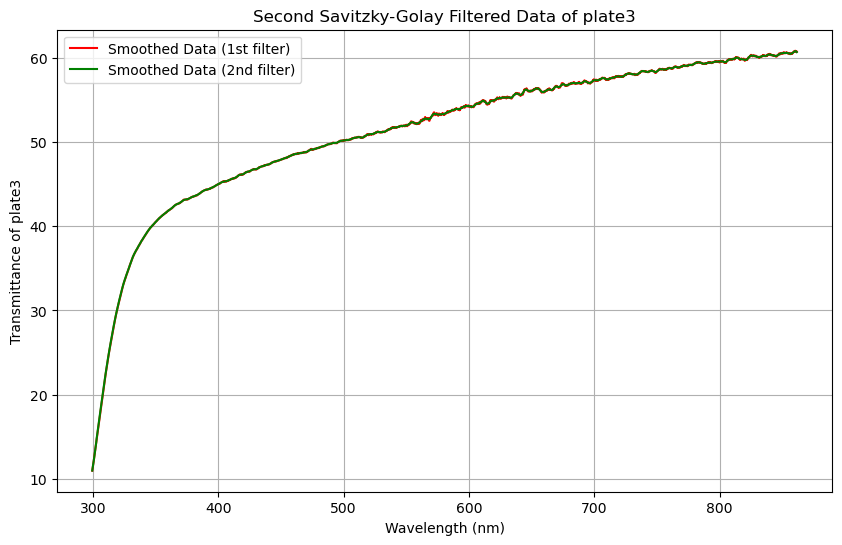

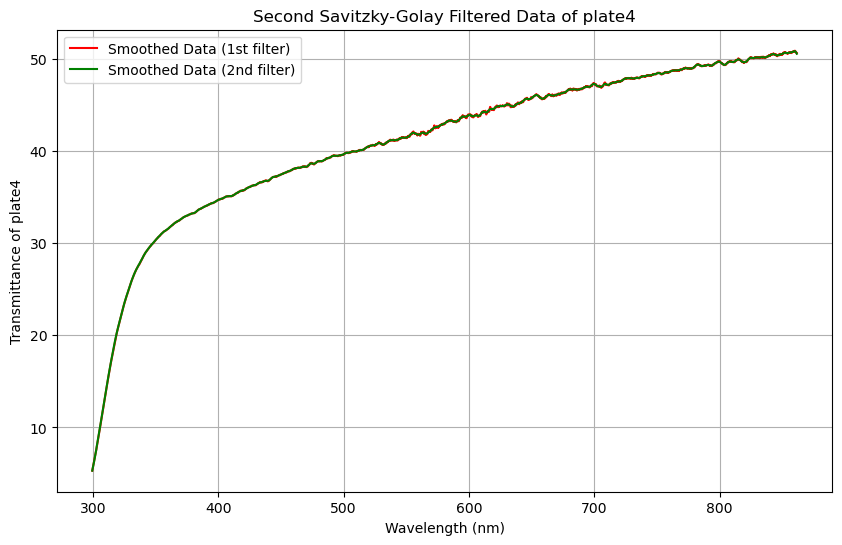

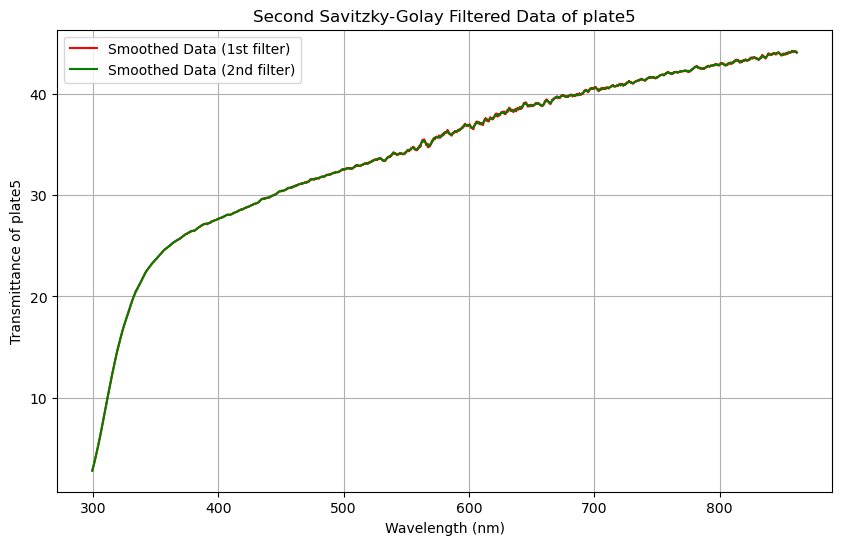

In [7]:
## 第二次滤波 Savitzky-Golay滤波器（SG）
for i in [1, 2, 3, 4, 5]:
    
    # 读取第一次滤波后的数据
    filtered_data = np.loadtxt('filterData_plate' + str(i) + '.txt', delimiter='\t', skiprows=1)
    wavelength = filtered_data[:, 0]
    smoothed_intensity1 = filtered_data[:, 1]

    # 使用Savitzky-Golay滤波器进行第二次滤波
    window_size = 40  # 滤波器窗口大小
    poly_order = 3    # 多项式拟合阶数

    smoothed_intensity2 = savgol_filter(smoothed_intensity1, window_size, poly_order)

    # 绘制第二次滤波后的数据
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, smoothed_intensity1, label='Smoothed Data (1st filter)', color='red')
    plt.plot(wavelength, smoothed_intensity2, label='Smoothed Data (2nd filter)', color='green')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Transmittance of plate' + str(i))
    plt.title('Second Savitzky-Golay Filtered Data of plate' + str(i))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 输出第二次滤波后的数据到txt文件
    np.savetxt('second_filterdata_plate' + str(i) + '.txt', np.column_stack((wavelength, smoothed_intensity2)), delimiter='\t', header='Wavelength (nm)\tSmoothed Intensity', fmt='%0.6f')

In [8]:
## 计算平均透射率

# 定义波长区间
start_wavelength = 440  # 起始波长
end_wavelength = 680    # 结束波长

# 找到波长区间内的索引
start_index = np.argmax(wavelength >= start_wavelength)
end_index = np.argmax(wavelength >= end_wavelength)

for i in [1, 2, 3, 4, 5]:
    
    # 读取第二次滤波后的数据
    filtered_data = np.loadtxt('second_filterdata_plate' + str(i) + '.txt', delimiter='\t', skiprows=1)
    wavelength = filtered_data[:, 0]
    smoothed_intensity = filtered_data[:, 1]

    # 提取波长区间内的平滑强度数据
    selected_intensity = smoothed_intensity[start_index:end_index]

    # 计算平均透射率
    average_transmittance = np.mean(selected_intensity)

    print("Average Transmittance of plate" + str(i) +":", average_transmittance)


Average Transmittance of plate1: 80.40292552979699
Average Transmittance of plate2: 67.17951995874263
Average Transmittance of plate3: 52.51187207596594
Average Transmittance of plate4: 42.09889192796333
Average Transmittance of plate5: 35.0522839318926


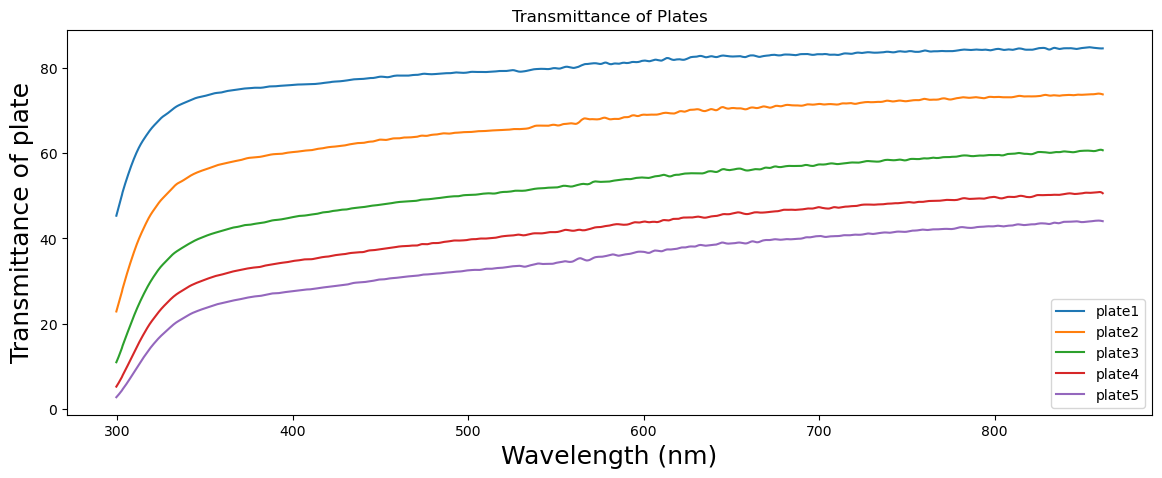

In [14]:
## 在同一幅图中做出五条二次滤波后的曲线

# 建立作图画布
fig, ax = plt.subplots(figsize=(14, 5))

# 读区二次滤波数据并作图
for i in [1, 2, 3, 4, 5]:
    filtered_data = np.loadtxt('second_filterdata_plate' + str(i) + '.txt', delimiter='\t', skiprows=1)
    wavelength = filtered_data[:, 0]
    smoothed_intensity = filtered_data[:, 1]
    ax.plot(wavelength, smoothed_intensity, label='plate' + str(i))
    ax.set_xlabel('Wavelength (nm)', fontsize=18)
    ax.set_ylabel('Transmittance of plate', fontsize=18)
   
# 完善作图
ax.set_title('Transmittance of Plates')
ax.legend()
plt.show()